In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [38]:
df_customer_position = df.dropna(subset=['customer_position'])

converted_counts_customer_position = df_customer_position.groupby('customer_position')['is_converted'].sum().reset_index()
total_counts_customer_position = df_customer_position.groupby('customer_position')['is_converted'].count().reset_index()

ratio_df_customer_position = pd.merge(converted_counts_customer_position, total_counts_customer_position, on='customer_position', how='left')
ratio_df_customer_position['conversion_ratio'] = ratio_df_customer_position['is_converted_x'] / ratio_df_customer_position['is_converted_y']

top10_customer_positions = ratio_df_customer_position.sort_values(by='is_converted_y', ascending=False).head(10)
for index, row in top10_customer_positions.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['customer_position']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

none 별 is_converted 비율: 8.38%, 전체 갯수: 19680, is_converted된 갯수: 1649
manager 별 is_converted 비율: 10.05%, 전체 갯수: 8217, is_converted된 갯수: 826
ceo/founder 별 is_converted 비율: 8.24%, 전체 갯수: 7984, is_converted된 갯수: 658
other 별 is_converted 비율: 6.35%, 전체 갯수: 6499, is_converted된 갯수: 413
director 별 is_converted 비율: 8.94%, 전체 갯수: 4843, is_converted된 갯수: 433
associate/analyst 별 is_converted 비율: 12.51%, 전체 갯수: 2597, is_converted된 갯수: 325
partner 별 is_converted 비율: 9.15%, 전체 갯수: 2536, is_converted된 갯수: 232
entry level 별 is_converted 비율: 4.42%, 전체 갯수: 2216, is_converted된 갯수: 98
others 별 is_converted 비율: 1.87%, 전체 갯수: 964, is_converted된 갯수: 18
c-level executive 별 is_converted 비율: 8.70%, 전체 갯수: 851, is_converted된 갯수: 74


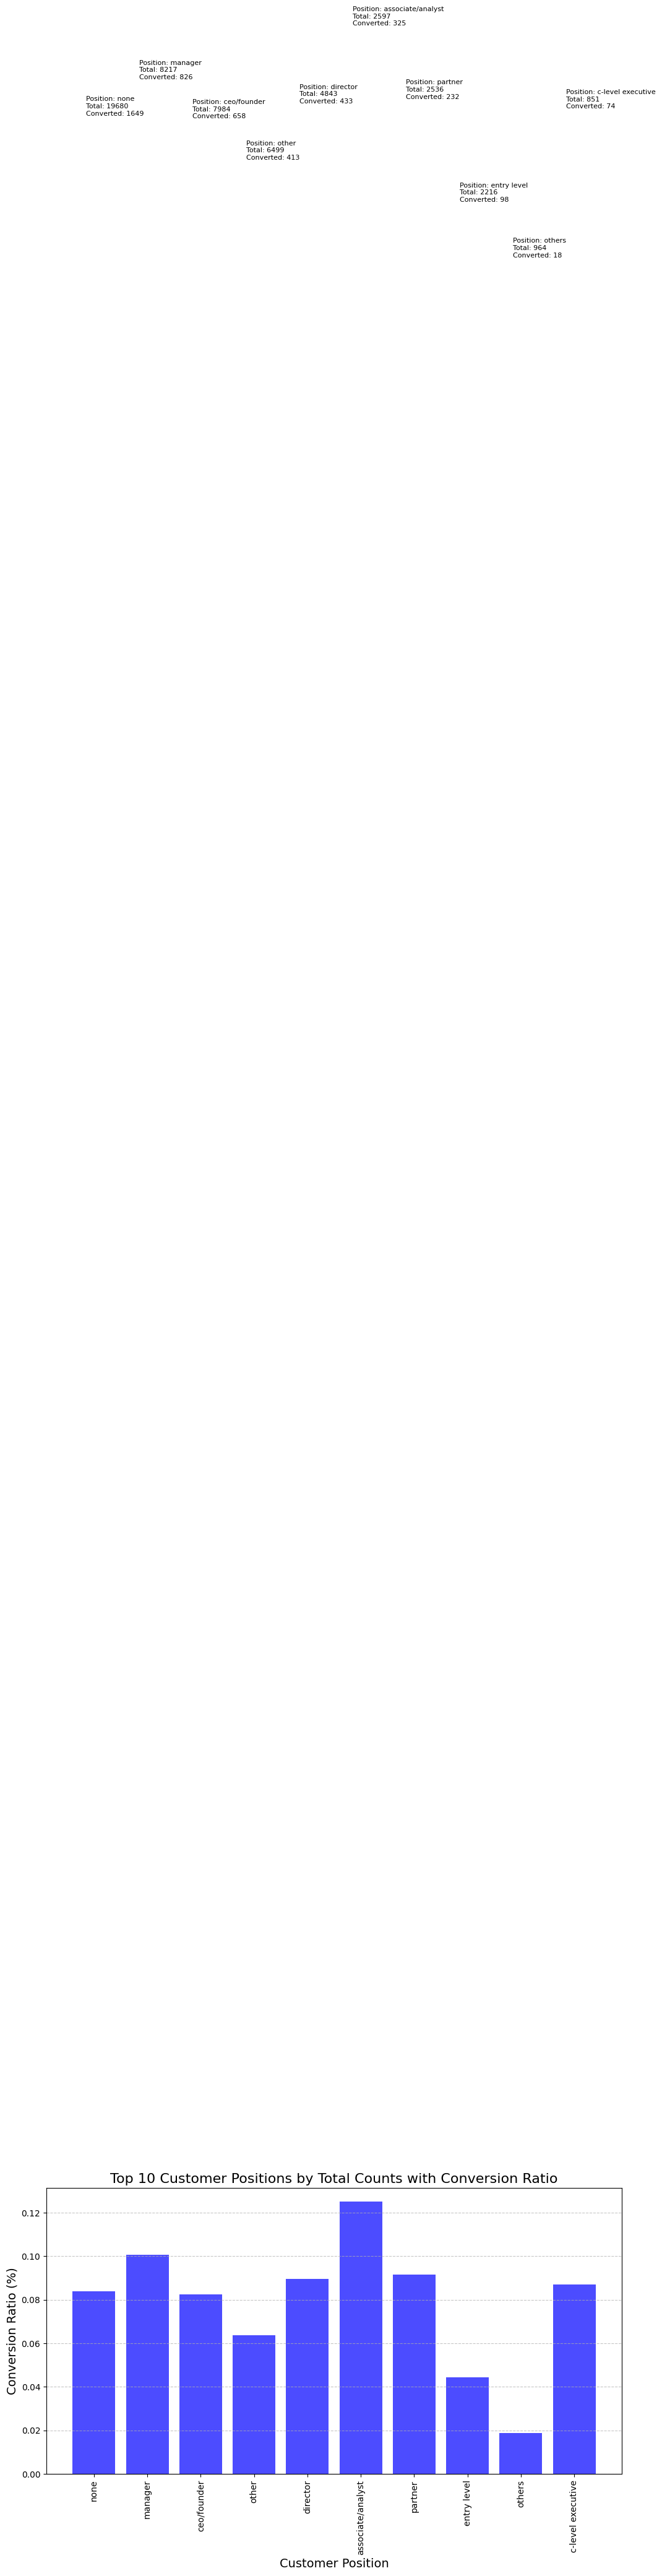

In [40]:
plt.figure(figsize=(12, 6))
bars = plt.bar(top10_customer_positions['customer_position'], top10_customer_positions['conversion_ratio'], color='blue', alpha=0.7)

for bar, total, converted, position in zip(bars, top10_customer_positions['is_converted_y'], top10_customer_positions['is_converted_x'], top10_customer_positions['customer_position']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1,
             f'Position: {position}\nTotal: {total}\nConverted: {converted}', fontsize=8, color='black')

plt.title('Top 10 Customer Positions by Total Counts with Conversion Ratio', fontsize=16)
plt.xlabel('Customer Position', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
